<a href="https://colab.research.google.com/github/ndvinh98/CS114.K21-Machine-Learning/blob/master/LAB_06_First_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#cài đặt các lib cần thiết
from google.colab import files
!pip install -q kaggle

In [ ]:
#sử dụng kagle API để download dataset
uploaded = files.upload()

In [ ]:
#lấy data từ kaggle nhập sang colab
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d alxmamaev/flowers-recognition

In [ ]:
#unzip dataset
!unzip /content/flowers-recognition.zip
%rm -rf /content/flowers/flowers

In [ ]:
# Thêm thư viện
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from imutils import paths
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
from keras import models
from keras import layers
from keras import optimizers
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.externals import joblib
import cv2
from pathlib import Path
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
#visualize dataset
flowers_path=Path('/content/flowers')
flower_types = os.listdir(flowers_path)
flowers = []
for species in flower_types:
    all_flowers = os.listdir(flowers_path / species)
    for flower in all_flowers:
        flowers.append((species, str(flowers_path /species) + '/' + flower))
     
flowers = pd.DataFrame(data=flowers, columns=['category', 'image'], index=None)
fl_count = flowers['category'].value_counts()
f, axe = plt.subplots(1,1,figsize=(10,6))
sns.barplot(x = fl_count.index, y = fl_count.values, ax = axe)
axe.set_title("Số lượng hoa mỗi class", fontsize=16)
#axe.set_xlabel('class', fontsize=14)
#axe.set_ylabel('số lượng', fontsize=14)
plt.show()

In [ ]:
# Lấy các đường dẫn đến ảnh.
image_path = list(paths.list_images('/content/flowers'))

# Đổi vị trí ngẫu nhiên các đường dẫn ảnh
random.shuffle(image_path)

In [ ]:
# Đường dẫn ảnh sẽ là dataset/tên_loài_hoa/tên_ảnh ví dụ dataset/Bluebell/image_0241.jpg nên p.split(os.path.sep)[-2] sẽ lấy ra được tên loài hoa
labels = [p.split(os.path.sep)[-2] for p in image_path]

# Chuyển tên các loài hoa thành số
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
# Load model VGG 16 của ImageNet dataset, include_top=False để bỏ phần Fully connected layer ở cuối.
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
# Load ảnh và resize về đúng kích thước mà VGG 16 cần là (224,224)
list_image = []
for (j, imagePath) in enumerate(image_path):
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    
    image = np.expand_dims(image, 0)
    image = imagenet_utils.preprocess_input(image)
    
    list_image.append(image)
    
list_image = np.vstack(list_image)

In [ ]:
# Dùng pre-trained model để lấy ra các feature của ảnh
features = model.predict(list_image)

# Giống bước flatten trong CNN, chuyển từ tensor 3 chiều sau ConvNet sang vector 1 chiều
features = features.reshape((features.shape[0], 512*7*7))

In [16]:
# Chia traing set, test set tỉ lệ 80-20
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [17]:
#train với linearSVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

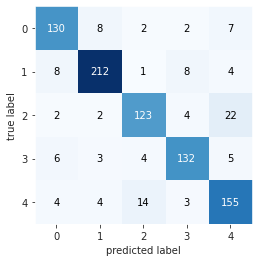

In [20]:
#đánh giá model
from mlxtend.plotting import plot_confusion_matrix
pred=np.around(svm_linear.predict(X_test))
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,pred))
plt.show()

In [22]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       149
           1       0.93      0.91      0.92       233
           2       0.85      0.80      0.83       153
           3       0.89      0.88      0.88       150
           4       0.80      0.86      0.83       180

    accuracy                           0.87       865
   macro avg       0.87      0.87      0.87       865
weighted avg       0.87      0.87      0.87       865

